In [142]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [4]:
data_path='goodreads_books_comics_graphic.json'

In [5]:
comics=pd.read_json(data_path, lines=True)

In [6]:
comics.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series,a,b
0,,1.0,[],US,,"[{'count': '228', 'name': 'to-read'}, {'count'...",B00NLXQ534,true,4.12,,...,,https://www.goodreads.com/book/show/25742454-t...,https://s.gr-assets.com/assets/nophoto/book/11...,25742454.0,1.0,42749946.0,The Switchblade Mamma,The Switchblade Mamma,NaN,NaN
1,2205073346,2.0,[],US,fre,"[{'count': '2', 'name': 'bd'}, {'count': '2', ...",,false,3.94,,...,2016,https://www.goodreads.com/book/show/30128855-c...,https://images.gr-assets.com/books/1462644346m...,30128855.0,16.0,50558228.0,Cruelle,Cruelle,NaN,NaN
2,,5.0,"[246830, 362583, 362581, 623032]",US,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",,false,4.28,,...,2012,https://www.goodreads.com/book/show/13571772-c...,https://images.gr-assets.com/books/1333287305m...,13571772.0,51.0,102217.0,Captain America: Winter Soldier (The Ultimate ...,Captain America: Winter Soldier (The Ultimate ...,NaN,NaN
3,,1.0,[],US,eng,"[{'count': '222', 'name': 'to-read'}, {'count'...",B06XKGGSB7,true,4.05,B06XKGGSB7,...,,https://www.goodreads.com/book/show/35452242-b...,https://s.gr-assets.com/assets/nophoto/book/11...,35452242.0,6.0,54276229.0,Bounty Hunter 4/3: My Life in Combat from Mari...,Bounty Hunter 4/3: My Life in Combat from Mari...,NaN,NaN
4,0930289765,6.0,"[266759, 1096220]",US,en-US,"[{'count': '20', 'name': 'to-read'}, {'count':...",,false,4.06,,...,1997,https://www.goodreads.com/book/show/707611.Sup...,https://images.gr-assets.com/books/1307838888m...,707611.0,51.0,693886.0,"Superman Archives, Vol. 2","Superman Archives, Vol. 2",NaN,NaN


In [7]:
comics

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series,a,b
0,,1.0,[],US,,"[{'count': '228', 'name': 'to-read'}, {'count'...",B00NLXQ534,true,4.12,,...,,https://www.goodreads.com/book/show/25742454-t...,https://s.gr-assets.com/assets/nophoto/book/11...,25742454.0,1.0,42749946.0,The Switchblade Mamma,The Switchblade Mamma,NaN,NaN
1,2205073346,2.0,[],US,fre,"[{'count': '2', 'name': 'bd'}, {'count': '2', ...",,false,3.94,,...,2016,https://www.goodreads.com/book/show/30128855-c...,https://images.gr-assets.com/books/1462644346m...,30128855.0,16.0,50558228.0,Cruelle,Cruelle,NaN,NaN
2,,5.0,"[246830, 362583, 362581, 623032]",US,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",,false,4.28,,...,2012,https://www.goodreads.com/book/show/13571772-c...,https://images.gr-assets.com/books/1333287305m...,13571772.0,51.0,102217.0,Captain America: Winter Soldier (The Ultimate ...,Captain America: Winter Soldier (The Ultimate ...,NaN,NaN
3,,1.0,[],US,eng,"[{'count': '222', 'name': 'to-read'}, {'count'...",B06XKGGSB7,true,4.05,B06XKGGSB7,...,,https://www.goodreads.com/book/show/35452242-b...,https://s.gr-assets.com/assets/nophoto/book/11...,35452242.0,6.0,54276229.0,Bounty Hunter 4/3: My Life in Combat from Mari...,Bounty Hunter 4/3: My Life in Combat from Mari...,NaN,NaN
4,0930289765,6.0,"[266759, 1096220]",US,en-US,"[{'count': '20', 'name': 'to-read'}, {'count':...",,false,4.06,,...,1997,https://www.goodreads.com/book/show/707611.Sup...,https://images.gr-assets.com/books/1307838888m...,707611.0,51.0,693886.0,"Superman Archives, Vol. 2","Superman Archives, Vol. 2",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89410,,4.0,[],US,eng,"[{'count': '604', 'name': 'to-read'}, {'count'...",B00OEK0HQE,true,4.24,B00OEK0HQE,...,2014,https://www.goodreads.com/book/show/23363286-d...,https://images.gr-assets.com/books/1413258573m...,23363286.0,15.0,42919549.0,Dead Endings,Dead Endings,NaN,NaN
89411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
89412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
89413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [8]:
comics['a'].unique() , comics['b'].unique()

(array([nan,  1.]), array([nan,  2.]))

In [9]:
comics.dtypes

isbn                     object
text_reviews_count      float64
series                   object
country_code             object
language_code            object
popular_shelves          object
asin                     object
is_ebook                 object
average_rating          float64
kindle_asin              object
similar_books            object
description              object
format                   object
link                     object
authors                  object
publisher                object
num_pages                object
publication_day          object
isbn13                   object
publication_month        object
edition_information      object
publication_year         object
url                      object
image_url                object
book_id                 float64
ratings_count           float64
work_id                 float64
title                    object
title_without_series     object
a                       float64
b                       float64
dtype: o

In [10]:
comics.columns

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin',
       'similar_books', 'description', 'format', 'link', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year', 'url',
       'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series', 'a', 'b'],
      dtype='object')

**We can remove some of the columns right away, since they wouldnt be useful for this kind of model**

In [11]:
comics=comics.drop(['isbn','asin','kindle_asin','link','isbn13','url', 'image_url', 'book_id','work_id'],axis=1)

In [12]:
comics.describe().T

,count,mean,std,min,25%,50%,75%,max
text_reviews_count,89411.0,19.531948,118.265875,0.0,2.00,4.00,11.00,10057.0
average_rating,89411.0,3.908330,0.426598,0.0,3.66,3.97,4.22,5.0
ratings_count,89411.0,382.483766,3199.391132,0.0,13.00,39.00,133.00,406669.0
a,2.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.0
b,2.0,2.000000,0.000000,2.0,2.00,2.00,2.00,2.0


In [13]:
comics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89415 entries, 0 to 89414
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text_reviews_count    89411 non-null  float64
 1   series                89411 non-null  object 
 2   country_code          89411 non-null  object 
 3   language_code         89411 non-null  object 
 4   popular_shelves       89411 non-null  object 
 5   is_ebook              89411 non-null  object 
 6   average_rating        89411 non-null  float64
 7   similar_books         89411 non-null  object 
 8   description           89411 non-null  object 
 9   format                89411 non-null  object 
 10  authors               89411 non-null  object 
 11  publisher             89411 non-null  object 
 12  num_pages             89411 non-null  object 
 13  publication_day       89411 non-null  object 
 14  publication_month     89411 non-null  object 
 15  edition_information

In [14]:
comics.head(5)

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,description,format,...,num_pages,publication_day,publication_month,edition_information,publication_year,ratings_count,title,title_without_series,a,b
0,1.0,[],US,,"[{'count': '228', 'name': 'to-read'}, {'count'...",true,4.12,"[25653153, 25699172, 23530486, 12984185, 25538...",Lillian Ann Cross is forced to live the worst ...,,...,,,,,,1.0,The Switchblade Mamma,The Switchblade Mamma,NaN,NaN
1,2.0,[],US,fre,"[{'count': '2', 'name': 'bd'}, {'count': '2', ...",false,3.94,[],"Florence Dupre Latour raconte comment, de son ...",,...,,22,1,,2016,16.0,Cruelle,Cruelle,NaN,NaN
2,5.0,"[246830, 362583, 362581, 623032]",US,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",false,4.28,"[13590139, 105963, 207585, 10503130, 4645370, ...",The questions plaguing Captain America's dream...,Hardcover,...,146,,,,2012,51.0,Captain America: Winter Soldier (The Ultimate ...,Captain America: Winter Soldier (The Ultimate ...,NaN,NaN
3,1.0,[],US,eng,"[{'count': '222', 'name': 'to-read'}, {'count'...",true,4.05,[],The fight for Jason Delgado's life and soul be...,,...,,,,,,6.0,Bounty Hunter 4/3: My Life in Combat from Mari...,Bounty Hunter 4/3: My Life in Combat from Mari...,NaN,NaN
4,6.0,"[266759, 1096220]",US,en-US,"[{'count': '20', 'name': 'to-read'}, {'count':...",false,4.06,[],These are the stories that catapulted Superman...,Hardcover,...,272,14,11,,1997,51.0,"Superman Archives, Vol. 2","Superman Archives, Vol. 2",NaN,NaN


In [15]:
comics['language_code'].unique()

array(['', 'fre', 'eng', 'en-US', 'kor', 'jpn', 'spa', 'zho', 'ita',
       'en-GB', 'nor', 'ind', 'cze', 'ben', 'swe', 'ger', 'nl', 'por',
       'en-CA', 'gre', 'fin', 'rum', 'bos', 'msa', 'tur', 'per', 'pol',
       'vie', 'hin', 'mul', 'dan', 'scr', 'tha', 'fil', 'rus', 'bul',
       'srp', 'ara', 'nno', 'lav', 'heb', 'pes', 'cat', 'tgl', 'hun',
       'nob', 'est', '--', 'ach', 'kat', 'ira', 'ukr', 'inh', 'slv',
       'lit', 'sco', 'tel', 'slo', 'vai', 'eus', 'abk', 'ine', 'isl',
       'glg', 'nld', 'wak', 'iku', 'fiu', 'aze', 'afr', 'dut', 'en', nan],
      dtype=object)

In [16]:
comics.groupby('language_code').size().sort_values(ascending = False).head(10)

language_code
         29614
eng      29520
fre       4257
ind       3965
spa       3956
jpn       3636
en-US     2965
ita       2635
ger       1589
en-GB     1326
dtype: int64

In [17]:
comics['language_code'].replace({'':'no info'},inplace=True)

In [18]:
no_info=comics[comics['language_code']=='no info']

In [19]:
no_info.head(50)

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,description,format,...,num_pages,publication_day,publication_month,edition_information,publication_year,ratings_count,title,title_without_series,a,b
0,1.0,[],US,no info,"[{'count': '228', 'name': 'to-read'}, {'count'...",true,4.12,"[25653153, 25699172, 23530486, 12984185, 25538...",Lillian Ann Cross is forced to live the worst ...,,...,,,,,,1.0,The Switchblade Mamma,The Switchblade Mamma,NaN,NaN
5,7.0,[910384],US,no info,"[{'count': '15', 'name': 'to-read'}, {'count':...",false,3.44,[],"Like everyone else in the future, Sui's used t...",Paperback Manga,...,206,2,1,,2007,46.0,"A.I. Revolution, Vol. 1","A.I. Revolution, Vol. 1",NaN,NaN
7,2.0,[961379],US,no info,"[{'count': '24', 'name': 'to-read'}, {'count':...",false,3.16,[],Comics horror veteran Mike Wolfer writes and i...,Paperback,...,160,8,3,,2016,38.0,"Crossed, Volume 15","Crossed, Volume 15",NaN,NaN
8,5.0,"[981445, 981448]",US,no info,"[{'count': '17', 'name': 'to-read'}, {'count':...",false,3.51,[],Alan Moore s redefining of the Crossed univers...,Paperback,...,160,22,3,,2016,44.0,"Crossed + One Hundred, Volume 2 (Crossed +100 #2)","Crossed + One Hundred, Volume 2 (Crossed +100 #2)",NaN,NaN
9,4.0,[834956],US,no info,"[{'count': '35', 'name': 'to-read'}, {'count':...",false,4.00,[],Garth Ennis visionary series reaches deep into...,Paperback,...,144,14,6,,2016,32.0,"War Stories, Volume 4","War Stories, Volume 4",NaN,NaN
13,5.0,[231779],US,no info,"[{'count': '133', 'name': 'manga'}, {'count': ...",false,4.39,"[7618067, 5582071, 905758, 89665, 4542235, 131...",This is the story of a group of boys who try t...,Paperback,...,230,14,2,,2012,152.0,"Naoki Urasawa's 20th Century Boys, Volume 19 (...","Naoki Urasawa's 20th Century Boys, Volume 19 (...",NaN,NaN
14,18.0,[1067421],US,no info,"[{'count': '33', 'name': 'to-read'}, {'count':...",true,1.86,[],SHE WOLF is a surreal exploration in horror as...,,...,,,,,,64.0,She Wolf #1,She Wolf #1,NaN,NaN
18,13.0,[],US,no info,"[{'count': '19', 'name': 'to-read'}, {'count':...",false,3.80,[],Join Ben Grimm and his pals as they clobber th...,Paperback,...,192,6,9,,2006,86.0,The Thing: Idol of Millions,The Thing: Idol of Millions,NaN,NaN
28,71.0,[716207],US,no info,"[{'count': '754', 'name': 'to-read'}, {'count'...",false,4.09,"[16098764, 12958913, 591116, 26071563, 1623109...",Bestselling writer Daniel Abraham and acclaime...,Hardcover,...,208,12,5,,2015,637.0,"A Game of Thrones: The Graphic Novel, Vol. 4","A Game of Thrones: The Graphic Novel, Vol. 4",NaN,NaN
31,14.0,[977597],US,no info,"[{'count': '119', 'name': 'to-read'}, {'count'...",false,3.73,"[266012, 85412, 1299025, 22620, 83284, 431964,...",Brilliantly explains how Jung broke away from ...,Paperback,...,176,15,12,,2004,105.0,Jung: A Graphic Guide,Jung: A Graphic Guide,NaN,NaN


In [20]:
len(comics['format'].unique())

234

In [21]:
comics.groupby('format').size().sort_values(ascending = False).head(10)

format
Paperback                47305
                         21696
Hardcover                15031
ebook                     1582
Mass Market Paperback     1032
Kindle Edition             760
Comic                      319
Unknown Binding            197
Comic Book                 186
Board book                 184
dtype: int64

In [22]:
comics['format'].replace({'':'no info'},inplace=True)

In [23]:
comics['edition_information'].unique()

array(['', 'revised first edition', 'Hellboy presenta', ..., '3a edicao',
       'Integral Edition', nan], dtype=object)

In [24]:
len(comics['edition_information'].unique())

2244

In [25]:
comics.groupby('edition_information').size().sort_values(ascending = False).head(10)

edition_information
                  82486
Trade               498
First               404
First Edition       245
Premiere            226
Deluxe Edition      180
Graphic Novel       134
1                   110
1st                  95
Tankoubon            90
dtype: int64

In [26]:
comics['edition_information'].replace({'1':'First Edition','First':'First Edition','1st':'First Edition'},inplace=True)

In [27]:
comics.groupby('edition_information').size().sort_values(ascending = False).head(20)

edition_information
                      82486
First Edition           854
Trade                   498
Premiere                226
Deluxe Edition          180
Graphic Novel           134
Tankoubon                90
Omnibus                  85
Digital Edition          83
Single Issue             82
Planet Manga             79
1st edition              73
1st Edition              69
Second Edition           48
scanlation               44
Nuevo Universo DC        41
Steve Morris cover       41
First edition            40
VIZBIG Edition           38
New Edition              33
dtype: int64

In [28]:
comics['edition_information'].replace({'First edition':'First Edition', '1st edition':'First Edition','1st Edition':'First Edition','first':'First Edition'},inplace=True)

In [29]:
comics.groupby('edition_information').size().sort_values(ascending = False).head(30)

edition_information
                                           82486
First Edition                               1050
Trade                                        498
Premiere                                     226
Deluxe Edition                               180
Graphic Novel                                134
Tankoubon                                     90
Omnibus                                       85
Digital Edition                               83
Single Issue                                  82
Planet Manga                                  79
Second Edition                                48
scanlation                                    44
Steve Morris cover                            41
Nuevo Universo DC                             41
VIZBIG Edition                                38
New Edition                                   33
English Edition                               33
Third Edition                                 30
Humble Bundle Edition                         28


In [30]:
comics['edition_information'].replace({'2nd Edition':'Second Edition', 'Second':'Second Edition'},inplace=True)

In [31]:
comics.groupby('edition_information').size().sort_values(ascending = False).head(60)

edition_information
                                                    82486
First Edition                                        1050
Trade                                                 498
Premiere                                              226
Deluxe Edition                                        180
Graphic Novel                                         134
Tankoubon                                              90
Omnibus                                                85
Digital Edition                                        83
Single Issue                                           82
Planet Manga                                           79
Second Edition                                         73
scanlation                                             44
Nuevo Universo DC                                      41
Steve Morris cover                                     41
VIZBIG Edition                                         38
English Edition                                     

In [32]:
comics['edition_information'].replace({'comiXology':'Comixology','Comixology Edition':'Comixology','2':'Second Edition','2nd':'Second Edition','2nd edition':'Second Edition'},inplace=True)

In [33]:
len(comics['edition_information'].unique())

2230

In [34]:
comics.groupby('edition_information').size().sort_values(ascending = False).tail(50)

edition_information
Movie tie-in                                     1
Mumin                                            1
Must #54                                         1
Must #55                                         1
Must #56                                         1
NOOK Comics with Comic View                      1
Mille emozioni #102                              1
NOOK Comics with Zoom View                       1
NTV Cizgi Klasikler                              1
Naive Livres                                     1
Narrativa #16                                    1
Nathalie Atlas                                   1
Naver Webtoon                                    1
Netgalley                                        1
Newbury Comics variant cover                     1
Ninth Edition                                    1
No ISBN - Edizione per le edicole                1
Nobrow Edition                                   1
None                                             1
Mistery Plu

In [35]:
comics.fillna({'a':0, 'b':0}, inplace=True)
print(comics)

       text_reviews_count                            series country_code  \
0                     1.0                                []           US   
1                     2.0                                []           US   
2                     5.0  [246830, 362583, 362581, 623032]           US   
3                     1.0                                []           US   
4                     6.0                 [266759, 1096220]           US   
...                   ...                               ...          ...   
89410                 4.0                                []           US   
89411                 NaN                               NaN          NaN   
89412                 NaN                               NaN          NaN   
89413                 NaN                               NaN          NaN   
89414                 NaN                               NaN          NaN   

      language_code                                    popular_shelves  \
0           n

In [36]:
comics.head()

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,description,format,...,num_pages,publication_day,publication_month,edition_information,publication_year,ratings_count,title,title_without_series,a,b
0,1.0,[],US,no info,"[{'count': '228', 'name': 'to-read'}, {'count'...",true,4.12,"[25653153, 25699172, 23530486, 12984185, 25538...",Lillian Ann Cross is forced to live the worst ...,no info,...,,,,,,1.0,The Switchblade Mamma,The Switchblade Mamma,0.0,0.0
1,2.0,[],US,fre,"[{'count': '2', 'name': 'bd'}, {'count': '2', ...",false,3.94,[],"Florence Dupre Latour raconte comment, de son ...",no info,...,,22,1,,2016,16.0,Cruelle,Cruelle,0.0,0.0
2,5.0,"[246830, 362583, 362581, 623032]",US,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",false,4.28,"[13590139, 105963, 207585, 10503130, 4645370, ...",The questions plaguing Captain America's dream...,Hardcover,...,146,,,,2012,51.0,Captain America: Winter Soldier (The Ultimate ...,Captain America: Winter Soldier (The Ultimate ...,0.0,0.0
3,1.0,[],US,eng,"[{'count': '222', 'name': 'to-read'}, {'count'...",true,4.05,[],The fight for Jason Delgado's life and soul be...,no info,...,,,,,,6.0,Bounty Hunter 4/3: My Life in Combat from Mari...,Bounty Hunter 4/3: My Life in Combat from Mari...,0.0,0.0
4,6.0,"[266759, 1096220]",US,en-US,"[{'count': '20', 'name': 'to-read'}, {'count':...",false,4.06,[],These are the stories that catapulted Superman...,Hardcover,...,272,14,11,,1997,51.0,"Superman Archives, Vol. 2","Superman Archives, Vol. 2",0.0,0.0


In [38]:
is_NaN=comics.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = comics[row_has_NaN]

In [39]:
print(rows_with_NaN)

       text_reviews_count series country_code language_code popular_shelves  \
89411                 NaN    NaN          NaN           NaN             NaN   
89412                 NaN    NaN          NaN           NaN             NaN   
89413                 NaN    NaN          NaN           NaN             NaN   
89414                 NaN    NaN          NaN           NaN             NaN   

      is_ebook  average_rating similar_books description format  ...  \
89411      NaN             NaN           NaN         NaN    NaN  ...   
89412      NaN             NaN           NaN         NaN    NaN  ...   
89413      NaN             NaN           NaN         NaN    NaN  ...   
89414      NaN             NaN           NaN         NaN    NaN  ...   

      num_pages publication_day publication_month edition_information  \
89411       NaN             NaN               NaN                 NaN   
89412       NaN             NaN               NaN                 NaN   
89413       NaN         

In [40]:
comics=comics[:-4]

In [41]:
comics.groupby('average_rating').size().sort_values(ascending = False).head(10)

average_rating
4.00    2121
4.25    1054
4.17    1047
4.12    1006
4.33     966
3.67     948
3.88     948
4.11     932
4.20     928
4.21     919
dtype: int64

In [42]:
comics['is_ebook'] = comics['is_ebook'].replace(['true'],1)

In [43]:
comics['is_ebook'] = comics['is_ebook'].replace(['false'],0)

In [44]:
comics.head(5)

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,description,format,...,num_pages,publication_day,publication_month,edition_information,publication_year,ratings_count,title,title_without_series,a,b
0,1.0,[],US,no info,"[{'count': '228', 'name': 'to-read'}, {'count'...",1,4.12,"[25653153, 25699172, 23530486, 12984185, 25538...",Lillian Ann Cross is forced to live the worst ...,no info,...,,,,,,1.0,The Switchblade Mamma,The Switchblade Mamma,0.0,0.0
1,2.0,[],US,fre,"[{'count': '2', 'name': 'bd'}, {'count': '2', ...",0,3.94,[],"Florence Dupre Latour raconte comment, de son ...",no info,...,,22,1,,2016,16.0,Cruelle,Cruelle,0.0,0.0
2,5.0,"[246830, 362583, 362581, 623032]",US,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",0,4.28,"[13590139, 105963, 207585, 10503130, 4645370, ...",The questions plaguing Captain America's dream...,Hardcover,...,146,,,,2012,51.0,Captain America: Winter Soldier (The Ultimate ...,Captain America: Winter Soldier (The Ultimate ...,0.0,0.0
3,1.0,[],US,eng,"[{'count': '222', 'name': 'to-read'}, {'count'...",1,4.05,[],The fight for Jason Delgado's life and soul be...,no info,...,,,,,,6.0,Bounty Hunter 4/3: My Life in Combat from Mari...,Bounty Hunter 4/3: My Life in Combat from Mari...,0.0,0.0
4,6.0,"[266759, 1096220]",US,en-US,"[{'count': '20', 'name': 'to-read'}, {'count':...",0,4.06,[],These are the stories that catapulted Superman...,Hardcover,...,272,14,11,,1997,51.0,"Superman Archives, Vol. 2","Superman Archives, Vol. 2",0.0,0.0


# Feature Importance

Let's take only the numerical values from the data

In [45]:
comics.columns

Index(['text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'is_ebook', 'average_rating', 'similar_books',
       'description', 'format', 'authors', 'publisher', 'num_pages',
       'publication_day', 'publication_month', 'edition_information',
       'publication_year', 'ratings_count', 'title', 'title_without_series',
       'a', 'b'],
      dtype='object')

In [46]:
rating_estimation=comics[['average_rating','text_reviews_count','is_ebook','num_pages','publication_year','ratings_count']]

In [47]:
rating_estimation.head(5)

,average_rating,text_reviews_count,is_ebook,num_pages,publication_year,ratings_count
0,4.12,1.0,1,,,1.0
1,3.94,2.0,0,,2016,16.0
2,4.28,5.0,0,146,2012,51.0
3,4.05,1.0,1,,,6.0
4,4.06,6.0,0,272,1997,51.0


In [48]:
rating_estimation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89411 entries, 0 to 89410
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   average_rating      89411 non-null  float64
 1   text_reviews_count  89411 non-null  float64
 2   is_ebook            89411 non-null  int64  
 3   num_pages           89411 non-null  object 
 4   publication_year    89411 non-null  object 
 5   ratings_count       89411 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.1+ MB


In [49]:
rating_estimation['num_pages']=pd.to_numeric(rating_estimation['num_pages'])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
rating_estimation['publication_year']=pd.to_numeric(rating_estimation['publication_year'])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
rating_estimation.head(5)

,average_rating,text_reviews_count,is_ebook,num_pages,publication_year,ratings_count
0,4.12,1.0,1,NaN,NaN,1.0
1,3.94,2.0,0,NaN,2016.0,16.0
2,4.28,5.0,0,146.0,2012.0,51.0
3,4.05,1.0,1,NaN,NaN,6.0
4,4.06,6.0,0,272.0,1997.0,51.0


In [52]:
rating_estimation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89411 entries, 0 to 89410
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   average_rating      89411 non-null  float64
 1   text_reviews_count  89411 non-null  float64
 2   is_ebook            89411 non-null  int64  
 3   num_pages           65605 non-null  float64
 4   publication_year    70911 non-null  float64
 5   ratings_count       89411 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 4.1 MB


In [53]:
rating_estimation=rating_estimation.dropna()

In [54]:
rating_estimation.describe().T

,count,mean,std,min,25%,50%,75%,max
average_rating,63277.0,3.909436,0.428335,0.0,3.66,3.97,4.23,5.0
text_reviews_count,63277.0,23.361711,134.977364,0.0,2.00,5.00,14.00,10057.0
is_ebook,63277.0,0.030596,0.172221,0.0,0.00,0.00,0.00,1.0
num_pages,63277.0,173.232802,137.299520,0.0,106.00,168.00,202.00,8124.0
publication_year,63277.0,2009.756926,115.235343,3.0,2007.00,2011.00,2014.00,29017.0
ratings_count,63277.0,447.383536,3494.351702,0.0,14.00,46.00,168.00,406669.0


In [55]:
rating_estimation.groupby('publication_year').size() #<-- here I see plenty of erronious entries , so better to drop 

publication_year
3.0        1
13.0       1
16.0       1
162.0      1
192.0      2
          ..
2104.0     2
2105.0     1
3014.0     1
9999.0     1
29017.0    1
Length: 96, dtype: int64

In [56]:
rating_estimation.drop('publication_year',axis=1,inplace=True)

In [57]:
rating_estimation.head(5)

,average_rating,text_reviews_count,is_ebook,num_pages,ratings_count
2,4.28,5.0,0,146.0,51.0
4,4.06,6.0,0,272.0,51.0
5,3.44,7.0,0,206.0,46.0
6,4.15,9.0,0,224.0,39.0
7,3.16,2.0,0,160.0,38.0


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
y=rating_estimation['average_rating']

In [60]:
attributes=rating_estimation.drop('average_rating',axis=1)

In [61]:
rating_estimation

,average_rating,text_reviews_count,is_ebook,num_pages,ratings_count
2,4.28,5.0,0,146.0,51.0
4,4.06,6.0,0,272.0,51.0
5,3.44,7.0,0,206.0,46.0
6,4.15,9.0,0,224.0,39.0
7,3.16,2.0,0,160.0,38.0
...,...,...,...,...,...
89404,3.74,53.0,0,256.0,853.0
89405,4.22,2.0,0,180.0,66.0
89408,3.87,5.0,0,224.0,28.0
89409,3.00,2.0,1,30.0,10.0


In [62]:
attr_train,attr_test, l_train,l_test=train_test_split(attributes,y,train_size=0.7)

In [63]:
attr_train.shape ,attr_test.shape

((44293, 4), (18984, 4))

In [64]:
l_train.shape,l_test.shape

((44293,), (18984,))

In [65]:
attr_test

,text_reviews_count,is_ebook,num_pages,ratings_count
18307,10.0,0,80.0,82.0
15612,2.0,0,224.0,21.0
53356,7.0,0,464.0,50.0
47617,8.0,0,112.0,29.0
2394,1.0,0,344.0,28.0
...,...,...,...,...
45132,1.0,0,64.0,4.0
8947,1.0,0,192.0,3.0
60737,1.0,0,96.0,3.0
34282,7.0,0,130.0,190.0


In [66]:
attr_train.head(5)

,text_reviews_count,is_ebook,num_pages,ratings_count
60760,1.0,0,48.0,5.0
40097,12.0,0,52.0,160.0
75953,8.0,0,144.0,57.0
16889,3.0,0,104.0,34.0
88162,1.0,0,191.0,27.0


In [67]:
l_train=pd.DataFrame(l_train)

In [68]:
l_test=pd.DataFrame(l_test)

In [69]:
from statsmodels.regression.linear_model import RegressionResultsWrapper

In [70]:
import statsmodels.api as sm

In [71]:
y=l_train

In [72]:
x=attr_train

In [73]:
model=sm.OLS(y,x)

In [74]:
results=model.fit()

In [75]:
results.params

text_reviews_count    0.001112
is_ebook              2.245656
num_pages             0.014426
ratings_count         0.000009
dtype: float64

In [76]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.664      
Dependent Variable:     average_rating   AIC:                         198673.6250
Date:                   2020-10-08 14:48 BIC:                         198708.4193
No. Observations:       44293            Log-Likelihood:              -99333.    
Df Model:               4                F-statistic:                 2.190e+04  
Df Residuals:           44289            Prob (F-statistic):          0.00       
R-squared (uncentered): 0.664            Scale:                       5.1938     
------------------------------------------------------------------------------------
                       Coef.     Std.Err.       t        P>|t|      [0.025    0.975]
------------------------------------------------------------------------------------
text_reviews_count     0.0011      0.0001      9.1698    0.0000     0.0009    0.0014
is_ebook               2.2457      0.0628     35.7747    0.0000     2.1226    2.3687
num_pages              0.0144      0.0001    283.1377    0.0000     0.0143    0.0145
ratings_count          0.0000      0.0000      1.7846    0.0743    -0.0000    0.0000
---------------------------------------------------------------------------------
Omnibus:                68903.714         Durbin-Watson:            1.330        
Prob(Omnibus):          0.000             Jarque-Bera (JB):         161821483.333
Skew:                   -9.330            Prob(JB):                 0.000        
Kurtosis:               298.524           Condition No.:            20830        
=================================================================================
* The condition number is large (2e+04). This might indicate             strong
multicollinearity or other numerical problems.
"""

From statistical point of view, this need a lot of transformations, in order to become a trustful model. However, according to this result validated on the 5th % only the rating counts could be excluded.

In [147]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score

In [155]:
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(attr_train, l_train)
res=reg.predict(attr_test)

In [156]:
res

array([3.78612303, 4.05440851, 3.97674101, ..., 3.78612303, 3.78612303,
       3.78612303])

[Text(446.4, 475.65000000000003, 'num_pages <= 176.5\nmse = 0.183\nsamples = 44293\nvalue = 3.909'),
 Text(223.2, 339.75, 'ratings_count <= 244.5\nmse = 0.196\nsamples = 24576\nvalue = 3.803'),
 Text(111.6, 203.85000000000002, 'text_reviews_count <= 10.5\nmse = 0.207\nsamples = 20525\nvalue = 3.771'),
 Text(55.8, 67.94999999999999, 'mse = 0.213\nsamples = 16825\nvalue = 3.786'),
 Text(167.39999999999998, 67.94999999999999, 'mse = 0.176\nsamples = 3700\nvalue = 3.703'),
 Text(334.79999999999995, 203.85000000000002, 'text_reviews_count <= 20.5\nmse = 0.107\nsamples = 4051\nvalue = 3.963'),
 Text(279.0, 67.94999999999999, 'mse = 0.081\nsamples = 883\nvalue = 4.099'),
 Text(390.59999999999997, 67.94999999999999, 'mse = 0.107\nsamples = 3168\nvalue = 3.925'),
 Text(669.5999999999999, 339.75, 'ratings_count <= 294.5\nmse = 0.137\nsamples = 19717\nvalue = 4.042'),
 Text(558.0, 203.85000000000002, 'text_reviews_count <= 2.5\nmse = 0.147\nsamples = 15550\nvalue = 4.005'),
 Text(502.2, 67.949999

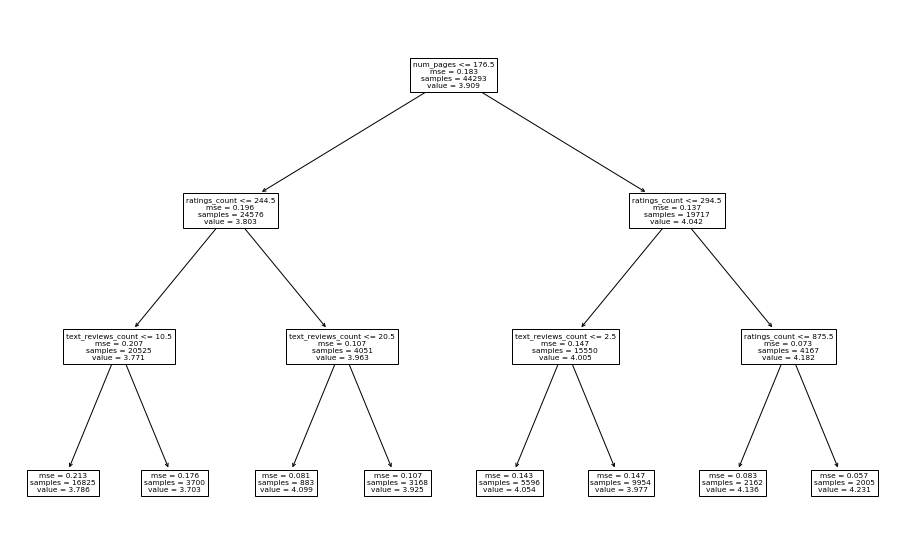

In [157]:
 _, ax = plt.subplots(figsize=(16,10))
plot_tree(reg, ax= ax,feature_names=attr_train.columns)

**SHAP Values**

In [158]:
conda install -c conda-forge shap

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


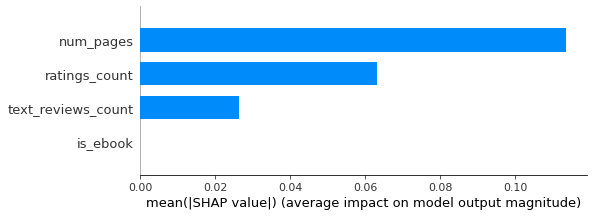

In [159]:
import shap
shap_values = shap.TreeExplainer(reg).shap_values(attr_train)
shap.summary_plot(shap_values, attr_train, plot_type="bar")

In [81]:
pip install rfpimp

Note: you may need to restart the kernel to use updated packages.


# I. Recommender system based on the description

In [86]:
comics.head(5)

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,description,format,...,num_pages,publication_day,publication_month,edition_information,publication_year,ratings_count,title,title_without_series,a,b
0,1.0,[],US,no info,"[{'count': '228', 'name': 'to-read'}, {'count'...",1,4.12,"[25653153, 25699172, 23530486, 12984185, 25538...",Lillian Ann Cross is forced to live the worst ...,no info,...,,,,,,1.0,The Switchblade Mamma,The Switchblade Mamma,0.0,0.0
1,2.0,[],US,fre,"[{'count': '2', 'name': 'bd'}, {'count': '2', ...",0,3.94,[],"Florence Dupre Latour raconte comment, de son ...",no info,...,,22,1,,2016,16.0,Cruelle,Cruelle,0.0,0.0
2,5.0,"[246830, 362583, 362581, 623032]",US,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",0,4.28,"[13590139, 105963, 207585, 10503130, 4645370, ...",The questions plaguing Captain America's dream...,Hardcover,...,146,,,,2012,51.0,Captain America: Winter Soldier (The Ultimate ...,Captain America: Winter Soldier (The Ultimate ...,0.0,0.0
3,1.0,[],US,eng,"[{'count': '222', 'name': 'to-read'}, {'count'...",1,4.05,[],The fight for Jason Delgado's life and soul be...,no info,...,,,,,,6.0,Bounty Hunter 4/3: My Life in Combat from Mari...,Bounty Hunter 4/3: My Life in Combat from Mari...,0.0,0.0
4,6.0,"[266759, 1096220]",US,en-US,"[{'count': '20', 'name': 'to-read'}, {'count':...",0,4.06,[],These are the stories that catapulted Superman...,Hardcover,...,272,14,11,,1997,51.0,"Superman Archives, Vol. 2","Superman Archives, Vol. 2",0.0,0.0


In [87]:
description=comics[['title','description','edition_information','format','language_code']]

In [88]:
description.head(10)

,title,description,edition_information,format,language_code
0,The Switchblade Mamma,Lillian Ann Cross is forced to live the worst ...,,no info,no info
1,Cruelle,"Florence Dupre Latour raconte comment, de son ...",,no info,fre
2,Captain America: Winter Soldier (The Ultimate ...,The questions plaguing Captain America's dream...,,Hardcover,eng
3,Bounty Hunter 4/3: My Life in Combat from Mari...,The fight for Jason Delgado's life and soul be...,,no info,eng
4,"Superman Archives, Vol. 2",These are the stories that catapulted Superman...,,Hardcover,en-US
5,"A.I. Revolution, Vol. 1","Like everyone else in the future, Sui's used t...",,Paperback Manga,no info
6,"War Stories, Volume 3",PRODUCT DESCRIPTION: The first new volume of G...,,Paperback,eng
7,"Crossed, Volume 15",Comics horror veteran Mike Wolfer writes and i...,,Paperback,no info
8,"Crossed + One Hundred, Volume 2 (Crossed +100 #2)",Alan Moore s redefining of the Crossed univers...,,Paperback,no info
9,"War Stories, Volume 4",Garth Ennis visionary series reaches deep into...,,Paperback,no info


In [89]:
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89411 entries, 0 to 89410
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                89411 non-null  object
 1   description          89411 non-null  object
 2   edition_information  89411 non-null  object
 3   format               89411 non-null  object
 4   language_code        89411 non-null  object
dtypes: object(5)
memory usage: 3.4+ MB


In [90]:
pip install rake_nltk

Note: you may need to restart the kernel to use updated packages.


In [91]:
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
description['key words']=""

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
description.columns

Index(['title', 'description', 'edition_information', 'format',
       'language_code', 'key words'],
      dtype='object')

In [94]:
for index,row in description.iterrows():
    plot=row['description']
    r=Rake()
    r.extract_keywords_from_text(plot)
    key_words_dict_scores = r.get_word_degrees()
    row['key words'] = list(key_words_dict_scores.keys())

In [95]:
description.head(5)

,title,description,edition_information,format,language_code,key words
0,The Switchblade Mamma,Lillian Ann Cross is forced to live the worst ...,,no info,no info,"[everyday, middle, class, american, new, striv..."
1,Cruelle,"Florence Dupre Latour raconte comment, de son ...",,no info,fre,"[version, trash, des, malheurs, de, sophie, ce..."
2,Captain America: Winter Soldier (The Ultimate ...,The questions plaguing Captain America's dream...,,Hardcover,eng,"[memories, wake, brutality, brutal, way, possi..."
3,Bounty Hunter 4/3: My Life in Combat from Mari...,The fight for Jason Delgado's life and soul be...,,no info,eng,"[tide, pivotal, figure, jason, delgado, earnin..."
4,"Superman Archives, Vol. 2",These are the stories that catapulted Superman...,,Hardcover,en-US,"[volumes, feature, one, world, earliest, adven..."


In [96]:
description.drop('description',axis=1,inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
description.head(5)

,title,edition_information,format,language_code,key words
0,The Switchblade Mamma,,no info,no info,"[everyday, middle, class, american, new, striv..."
1,Cruelle,,no info,fre,"[version, trash, des, malheurs, de, sophie, ce..."
2,Captain America: Winter Soldier (The Ultimate ...,,Hardcover,eng,"[memories, wake, brutality, brutal, way, possi..."
3,Bounty Hunter 4/3: My Life in Combat from Mari...,,no info,eng,"[tide, pivotal, figure, jason, delgado, earnin..."
4,"Superman Archives, Vol. 2",,Hardcover,en-US,"[volumes, feature, one, world, earliest, adven..."


In [104]:
description['bag_of_words'] = ''
columns = description.columns
for index, row in description.iterrows():
    words = ''
    for col in columns:
        if col =='key words':
            words = words + ' '.join(row[col])+ ' '
        elif col!='title':
            words = words + row[col]+ ' '
    row['bag_of_words'] = words

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
description.head(5)

,title,edition_information,format,language_code,key words,bag_of_words
0,The Switchblade Mamma,,no info,no info,"[everyday, middle, class, american, new, striv...",no info no info everyday middle class america...
1,Cruelle,,no info,fre,"[version, trash, des, malheurs, de, sophie, ce...",no info fre version trash des malheurs de sop...
2,Captain America: Winter Soldier (The Ultimate ...,,Hardcover,eng,"[memories, wake, brutality, brutal, way, possi...",Hardcover eng memories wake brutality brutal ...
3,Bounty Hunter 4/3: My Life in Combat from Mari...,,no info,eng,"[tide, pivotal, figure, jason, delgado, earnin...",no info eng tide pivotal figure jason delgado...
4,"Superman Archives, Vol. 2",,Hardcover,en-US,"[volumes, feature, one, world, earliest, adven...",Hardcover en-US volumes feature one world ear...


In [107]:
description.drop(columns=['format','edition_information','language_code','key words'],axis=1,inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [108]:
description.head(5)

,title,bag_of_words
0,The Switchblade Mamma,no info no info everyday middle class america...
1,Cruelle,no info fre version trash des malheurs de sop...
2,Captain America: Winter Soldier (The Ultimate ...,Hardcover eng memories wake brutality brutal ...
3,Bounty Hunter 4/3: My Life in Combat from Mari...,no info eng tide pivotal figure jason delgado...
4,"Superman Archives, Vol. 2",Hardcover en-US volumes feature one world ear...


Here I had memory issues, so the fastes solution was to cut off the sample in order to perform the computation of the cosine similarity

In [109]:
data=description[:20000]

In [110]:
data.head(10)

,title,bag_of_words
0,The Switchblade Mamma,no info no info everyday middle class america...
1,Cruelle,no info fre version trash des malheurs de sop...
2,Captain America: Winter Soldier (The Ultimate ...,Hardcover eng memories wake brutality brutal ...
3,Bounty Hunter 4/3: My Life in Combat from Mari...,no info eng tide pivotal figure jason delgado...
4,"Superman Archives, Vol. 2",Hardcover en-US volumes feature one world ear...
5,"A.I. Revolution, Vol. 1",Paperback Manga no info humans lives future l...
6,"War Stories, Volume 3",Paperback eng bear mythical dragon golan heig...
7,"Crossed, Volume 15",Paperback no info answer saving powerful new ...
8,"Crossed + One Hundred, Volume 2 (Crossed +100 #2)",Paperback no info contained whole new world c...
9,"War Stories, Volume 4",Paperback no info miles around airstrip singl...


In [121]:
data.set_index('title', inplace = True)

In [140]:
data.head(5)

,bag_of_words
title,
The Switchblade Mamma,no info no info everyday middle class america...
Cruelle,no info fre version trash des malheurs de sop...
"Captain America: Winter Soldier (The Ultimate Graphic Novels Collection: Publication Order, #7)",Hardcover eng memories wake brutality brutal ...
Bounty Hunter 4/3: My Life in Combat from Marine Scout Sniper to MARSOC,no info eng tide pivotal figure jason delgado...
"Superman Archives, Vol. 2",Hardcover en-US volumes feature one world ear...


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, The Switchblade Mamma to Batman Black and White #2
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   bag_of_words  20000 non-null  object
dtypes: object(1)
memory usage: 312.5+ KB


In [123]:
count = CountVectorizer()
count_matrix = count.fit_transform(data['bag_of_words'])
indices = pd.Series(data.index)
indices

0                                    The Switchblade Mamma
1                                                  Cruelle
2        Captain America: Winter Soldier (The Ultimate ...
3        Bounty Hunter 4/3: My Life in Combat from Mari...
4                                Superman Archives, Vol. 2
                               ...                        
19995    Hikaru no Go, Vol. 16: Chinese Go Association ...
19996                              Shin Angyo Onshi Vol. 1
19997                                   BDSM: Frontier #11
19998    Deus ex machina: Sonen (Theos ockulta kuriosit...
19999                            Batman Black and White #2
Name: title, Length: 20000, dtype: object

In [133]:
data.head(20)

,bag_of_words
title,
The Switchblade Mamma,no info no info everyday middle class america...
Cruelle,no info fre version trash des malheurs de sop...
"Captain America: Winter Soldier (The Ultimate Graphic Novels Collection: Publication Order, #7)",Hardcover eng memories wake brutality brutal ...
Bounty Hunter 4/3: My Life in Combat from Marine Scout Sniper to MARSOC,no info eng tide pivotal figure jason delgado...
"Superman Archives, Vol. 2",Hardcover en-US volumes feature one world ear...
"A.I. Revolution, Vol. 1",Paperback Manga no info humans lives future l...
"War Stories, Volume 3",Paperback eng bear mythical dragon golan heig...
"Crossed, Volume 15",Paperback no info answer saving powerful new ...
"Crossed + One Hundred, Volume 2 (Crossed +100 #2)",Paperback no info contained whole new world c...


In [124]:
data.columns

Index(['bag_of_words'], dtype='object')

In [125]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.05933908, 0.02203798, ..., 0.        , 0.        ,
        0.01977969],
       [0.05933908, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02203798, 0.        , 1.        , ..., 0.07427814, 0.13130643,
        0.06189845],
       ...,
       [0.        , 0.        , 0.07427814, ..., 1.        , 0.        ,
        0.06666667],
       [0.        , 0.        , 0.13130643, ..., 0.        , 1.        ,
        0.        ],
       [0.01977969, 0.        , 0.06189845, ..., 0.06666667, 0.        ,
        1.        ]])

In [129]:
def recommendations(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_3_indexes = list(score_series.iloc[1:4].index)
    for i in top_3_indexes:
        recommended_movies.append(list(data.index)[i])
  
    return recommended_movies

In [130]:
recommendations('The Switchblade Mamma')

["Blackest Night: Director's Cut #1",
 'Transformers: More Than Meets the Eye (2011-) #50',
 "Ironman: A History of Marvel's Armored Avenger (Superhero Sagas Book 4)"]

In [138]:
recommendations('Captain America: Winter Soldier (The Ultimate Graphic Novels Collection: Publication Order, #7)')

['Captain America: Winter Soldier, Volume 2',
 'Cartoons of World War II',
 'The Dark Tower, Volume 2 (2 of 5): The Long Road Home']

In [132]:
recommendations('Sherlock Holmes: Year One')

['Showcase Presents: Batman, Vol. 1',
 'The Darkness: Accursed, Vol. 5',
 'The Irregulars']

In [135]:
recommendations('續．星守犬')   #### the language issue needs to be investigated deeper (but we should use the entire dataset for better results)

['1/2王子 4: 無垠賣唱團 (1/2王子, #4)',
 'Psycho-Pass心靈判官 上',
 'Esconderse En Un Rincón Del Mundo']

In [136]:
recommendations('Seiyuu-ka! 12')

['Seiyuu-ka! 10', 'Gals! Vol.4', 'Tasogare Otome × Amnesia 10']

In [141]:
recommendations('Esconderse En Un Rincón Del Mundo') 

['續．星守犬', 'Psycho-Pass心靈判官 上', '1/2王子 4: 無垠賣唱團 (1/2王子, #4)']

Here I would also try to do stemming and or lemmatization. Further to that as I have noted upper,
we have few languages in this dataset, so maybe we should also think about solving this problem too. 